## Pandas
- Data Wrangling Tool
- EDA 와 Preprocessing할 때 사용
--------
이제부터는 분석적 관점!!

In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python2  %%py

In [2]:
%load_ext watermark

In [4]:
%watermark -a'박종익' -d -p numpy,pandas
##, 뒤에 공백있으면 에러가 뜬다

##분석하는 사람들은 git을 통해서 관리하고 있다.

##그래서 말하지 않아도 watermark를 찍어라!

박종익 2019-07-23 

numpy 1.13.3
pandas 0.23.4


In [5]:
import pandas as pd #.header = None

In [6]:
temp = []
for i in dir(pd):
    if i.startswith('read_'):
        temp.append(i)
else :
    print(len(temp))

18


In [7]:
[x for x in dir(pd) if x.startswith("read_")]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_msgpack',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

In [16]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                  header=None)

In [18]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
data[0].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: 0, dtype: float64

In [21]:
%matplotlib inline

In [24]:
data.mean() ##axis=None

0    5.843333
1    3.054000
2    3.758667
3    1.198667
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000166F4E98518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000166F5306208>]], dtype=object)

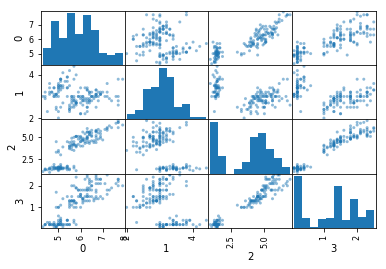

In [22]:
pd.plotting.scatter_matrix(data)

이 그림은 사실 이쁘진 않다... 선생님의 철칙은 플랏은 안이쁘면 안된다!

## Pandas 분석 순서
1. 데이터 잘 불러왔는지 check
2. data.info ... data자체에 대한 설명 str!
3. describe ... summary에 해당
4. boxplot 및 pairplot
5. aggregation을 통해서 경향 분석

In [25]:
data.info() ##r에서 str에 해당!
##RangeIndex?? 인덱스를 지정X 그래서 0-149
##전체 index및 column 또한 확인 가능!
##missing data가 없다~
## datatype ... object 는 str!
## 기계학습을 하려면 무조건 다 숫자여야 한다!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [41]:
data.describe(include="number")
##np.size는 missing data 포함 but! count의 경우 missing data 포함 X
##object는 제외!
##Describe를 통해 정규분포인지 + 박스플랏을 구할 수 있다.
##데이터의 분포를 보고자~~

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
data.describe(include="object")

,4
count,150
unique,3
top,Iris-setosa
freq,50


평균, 표준편차 - > 정규분포 

1. 큰 수의 법칙 ... 수가 크면 자기 분포에 가까워진다.
2. 중심극한정리 ... 수가 크면 정규분포에 가까워진다.

정규분포에 가깝다?? ... 데이터 수집이 매우매우 잘 되었다!

In [33]:
data.skew()

0    0.314911
1    0.334053
2   -0.274464
3   -0.104997
dtype: float64

In [34]:
data.kurtosis()

0   -0.552064
1    0.290781
2   -1.401921
3   -1.339754
dtype: float64

결측처리
1. 날리기
2. 특수한 값으로 채우기
3. Interpolation ... Imputation

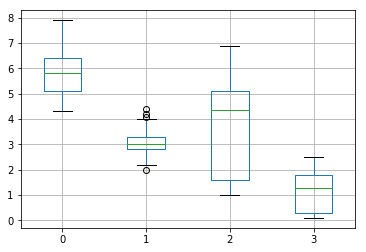

In [35]:
data.boxplot()
##Range에 벗어나는 아이들 outlier!

In [48]:
import seaborn as sns
#보통 s가 붙으면 stat

판다스를 기본으로 통계적인 표현들을 담은 것

In [44]:
data.rename({4:"species"}, axis = 1, inplace=True)

In [47]:
data.head()

,0,1,2,3,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


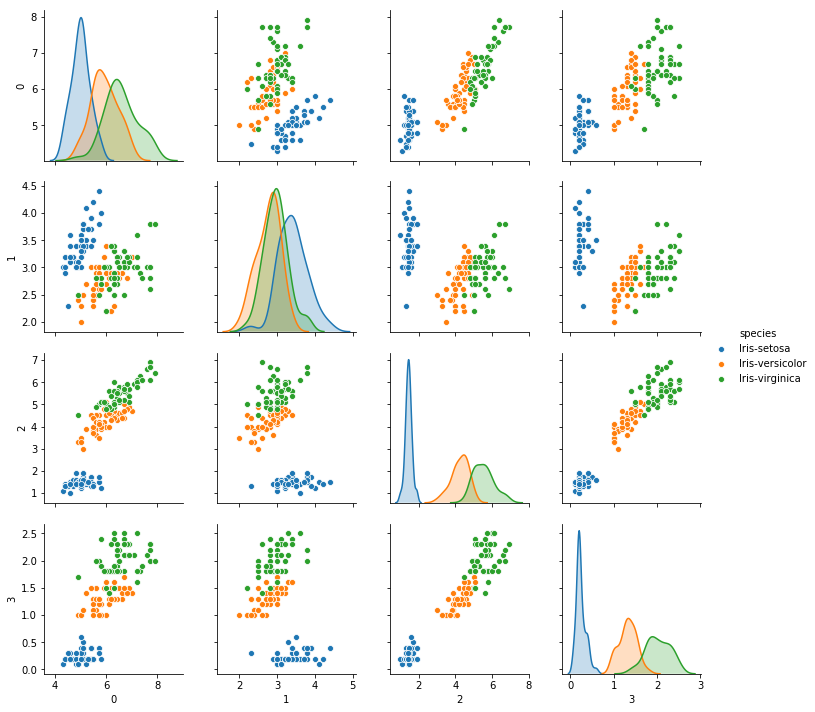

In [46]:
sns.pairplot(data,hue="species")